In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.formula.api as smf

In [15]:
df = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) ## burda usecols yapmmasaydım yukarıdaki ilocu kullanıcaktım
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)


In [17]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [19]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [21]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [35]:
##gercek değerler ve tahmin edilen değerleri kıyaslıcam
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10],
                   "hata": y[0:10]- reg.predict(X)[0:10]})
k_t


,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [37]:
### ortalama hatayı bulurken yaptığımız toplama çıkarma isleminde
##- değerler +ları götürür buda yanlış sonuc verir o yüzden karesini alırım

In [41]:
k_t["hata_kare"] = k_t["hata"]**2
np.sum(k_t["hata_kare"])
np.mean(k_t["hata_kare"])
np.sqrt(np.mean(k_t["hata_kare"]))

3.0480075999967755

In [43]:
##hataları yani artıkları( "hata": y[0:10]- reg.predict(X)[0:10]}) bundan farklı bide su şekilde de bulabiliriz
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

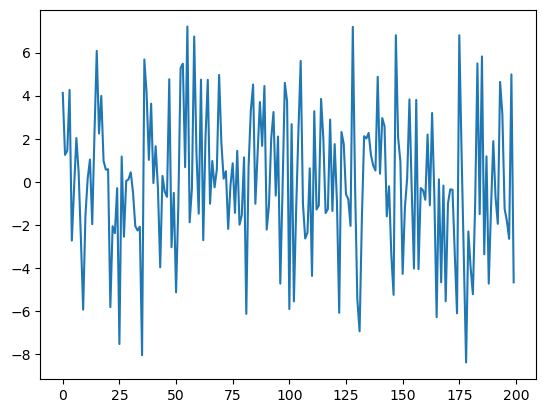

In [45]:
plt.plot(model.resid)